# Import Library

In [73]:
import pandas as pd

import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


In [74]:
pip install catboost

In [75]:
from catboost import CatBoostClassifier

# Import Dataset

In [125]:
train = pd.read_csv('/content/drive/MyDrive/freelancer/job2/train.csv')

In [77]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


## Train Dataset Info

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


## Categorical Columns

In [132]:
print('Categorical Columns \n')
for col in train.drop('ID',axis=1).select_dtypes(include='object').columns:
  print(f'{col} is Categorical column containing {train[col].nunique()} varible  \n')

Categorical Columns 

Gender is Categorical column containing 2 varible  

Region_Code is Categorical column containing 35 varible  

Occupation is Categorical column containing 4 varible  

Channel_Code is Categorical column containing 4 varible  

Credit_Product is Categorical column containing 2 varible  

Is_Active is Categorical column containing 2 varible  



## Train Dataset describtion

In [79]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


# Visualization

## Heatmap

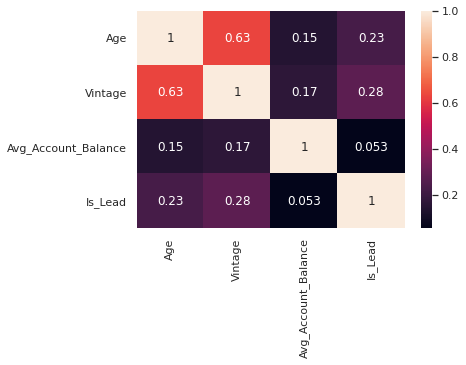

In [80]:
sns.heatmap(train.corr(),annot=True)

## Target Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


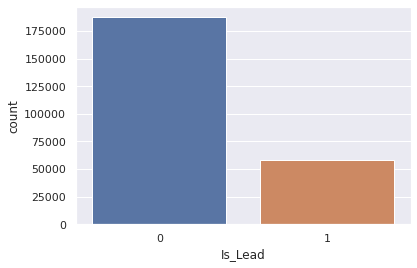

In [81]:
sns.countplot(train['Is_Lead'])

In [82]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


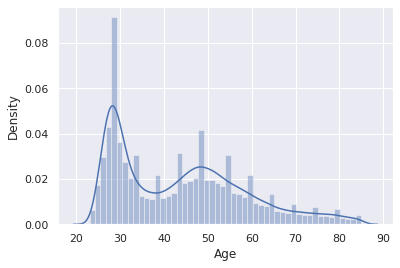

In [133]:
sns.distplot(train['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


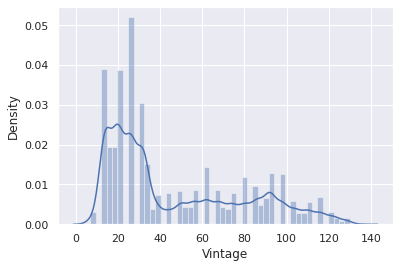

In [134]:
sns.distplot(train['Vintage'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


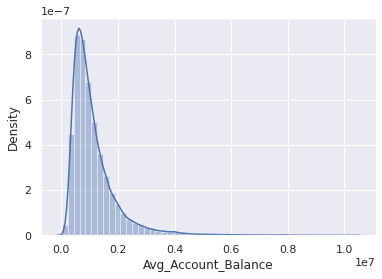

In [135]:
sns.distplot(train['Avg_Account_Balance'])

# Feature Engineering


In [83]:
# Drop unique ID - No use in Machine learning/Predicton
train.drop('ID',axis=1,inplace=True)

## Age Bin

In [84]:
qcut_series, qcut_intervals = pd.qcut(train.Age,
        q=5,
        labels=['oldest',
                'not so old',
                'medium',
                'newer',
                'latest'],retbins=True)

In [85]:
train['age_bin'] = qcut_series

## Vintage Bin

In [86]:
qcut_series, qcut_intervals = pd.qcut(train.Vintage,
        q=5,
        labels=['oldest',
                'not so old',
                'medium',
                'newer',
                'latest'],retbins=True)

In [87]:
train['vintage_bin'] = qcut_series

# Data Preprocessing

## Missing Visualization

In [88]:
def visualNA(df,perc=0):
    #Percentage of NAN Values 
    NAN = [(c, df[c].isna().mean()*100) for c in df]
    NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
    NAN = NAN[NAN.percentage > perc]
    print(NAN.sort_values("percentage", ascending=False))

In [89]:
visualNA(train)

      column_name  percentage
6  Credit_Product   11.934073


In [90]:
train['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

## Fill Missing Value

In [91]:
train['Credit_Product'].fillna('not',inplace=True)

## Log Transformation

In [136]:
train['Avg_Account_Balance'] = np.log1p(train['Avg_Account_Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


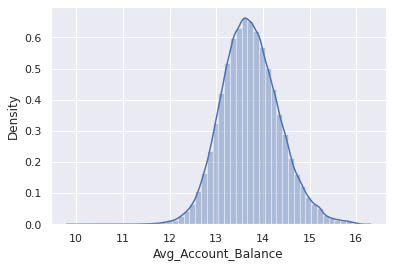

In [137]:
sns.distplot(train['Avg_Account_Balance'])

# Test

## Import Dataset

In [94]:
test = pd.read_csv('/content/drive/MyDrive/freelancer/job2/test.csv')

## Missing Visualization

In [95]:
visualNA(test)

      column_name  percentage
7  Credit_Product   11.890383


## Log Transformation

In [96]:
test['Avg_Account_Balance'] = np.log1p(test['Avg_Account_Balance'])

## Fill Missing Value

In [97]:
test['Credit_Product'].fillna('not',inplace=True)

In [98]:
# Save id for future submission
id = test['ID']

In [99]:
# Drop ID - No use
test.drop('ID',axis=1,inplace=True)

## Age Bin

In [100]:
qcut_series, qcut_intervals = pd.qcut(test.Age,
        q=5,
        labels=['oldest',
                'not so old',
                'medium',
                'newer',
                'latest'],retbins=True)

In [101]:
test['age_bin'] = qcut_series

## Vintage Bin

In [102]:
qcut_series, qcut_intervals = pd.qcut(test.Vintage,
        q=5,
        labels=['oldest',
                'not so old',
                'medium',
                'newer',
                'latest'],retbins=True)

In [103]:
test['vintage_bin'] = qcut_series

# Modelling

In [104]:
train.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead',
       'age_bin', 'vintage_bin'],
      dtype='object')

## Categorical Indexes

In [105]:
Categorical_feautres_index = [0,2,3,4,6,8,9,10]

## Independent and Dependent Variable

In [106]:
x = train.drop('Is_Lead',axis=1)
y = train['Is_Lead']

## Train Test Split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Initialization

In [108]:
model = CatBoostClassifier(auto_class_weights='Balanced',eval_metric='AUC',
                           random_seed=42,bootstrap_type='Bernoulli',subsample=.66,sampling_frequency='PerTreeLevel')

## Model Training

In [109]:
# fit the model with the training data
model.fit(X_train,y_train,eval_set=[(X_test,y_test)],cat_features = Categorical_feautres_index,
          early_stopping_rounds=20,plot=False)

Learning rate set to 0.116792
0:	test: 0.8632052	best: 0.8632052 (0)	total: 365ms	remaining: 6m 4s
1:	test: 0.8633841	best: 0.8633841 (1)	total: 700ms	remaining: 5m 49s
2:	test: 0.8638287	best: 0.8638287 (2)	total: 1.01s	remaining: 5m 37s
3:	test: 0.8633368	best: 0.8638287 (2)	total: 1.25s	remaining: 5m 10s
4:	test: 0.8643523	best: 0.8643523 (4)	total: 1.54s	remaining: 5m 5s
5:	test: 0.8656846	best: 0.8656846 (5)	total: 1.88s	remaining: 5m 12s
6:	test: 0.8658682	best: 0.8658682 (6)	total: 2.1s	remaining: 4m 57s
7:	test: 0.8664989	best: 0.8664989 (7)	total: 2.38s	remaining: 4m 54s
8:	test: 0.8667419	best: 0.8667419 (8)	total: 2.65s	remaining: 4m 51s
9:	test: 0.8671328	best: 0.8671328 (9)	total: 2.91s	remaining: 4m 48s
10:	test: 0.8672064	best: 0.8672064 (10)	total: 3.2s	remaining: 4m 47s
11:	test: 0.8675388	best: 0.8675388 (11)	total: 3.46s	remaining: 4m 44s
12:	test: 0.8675812	best: 0.8675812 (12)	total: 3.74s	remaining: 4m 43s
13:	test: 0.8682383	best: 0.8682383 (13)	total: 4.04s	rema

## Feature Importance

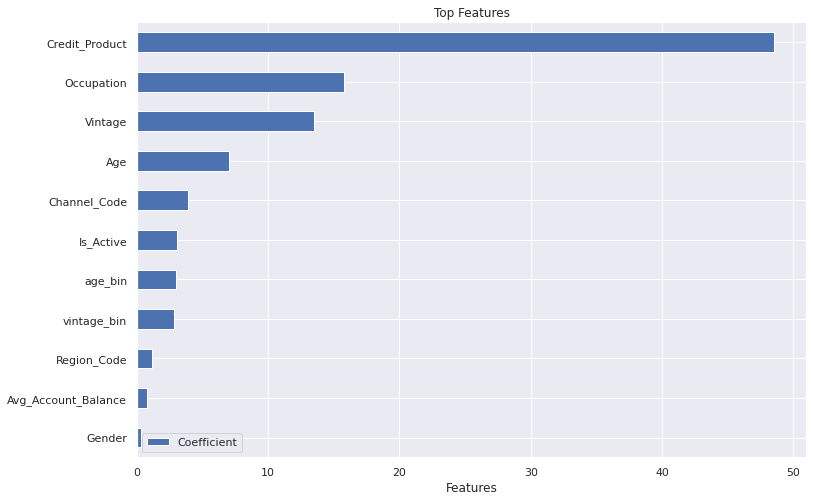

In [110]:
coeff_df = pd.DataFrame(model.get_feature_importance(),x.columns,columns=['Coefficient'])

fig, ax = plt.subplots(1,1,figsize=(12,8))
coeff_df.sort_values(by='Coefficient',ascending=True).plot(kind='barh',ax=ax)
plt.xlabel('Features')
plt.title('Top Features');

## Model Evaluation

In [111]:
pred_eval = model.predict(X_test)

### Confusion  Matrix

In [112]:
cm = confusion_matrix(y_test, pred_eval)/y_test.shape[0]*100

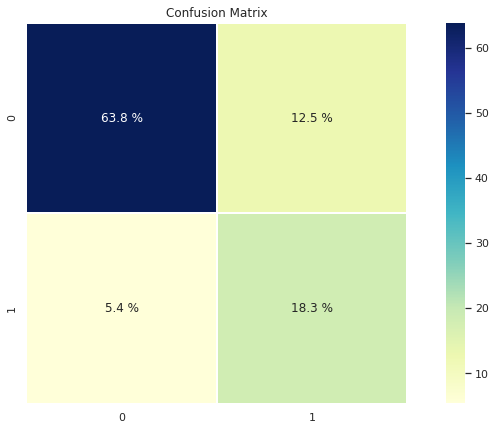

In [113]:

sns.set()
fig, ax0 = plt.subplots(figsize = (14,7))

ax = sns.heatmap(data = cm, annot=True, fmt = '.1f', square=1, linewidths=.5, cmap="YlGnBu")
ax0.set_title('Confusion Matrix')
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.show()

### Classification Report

In [114]:
print(classification_report(y_test,pred_eval))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     37520
           1       0.59      0.77      0.67     11625

    accuracy                           0.82     49145
   macro avg       0.76      0.80      0.77     49145
weighted avg       0.84      0.82      0.83     49145



# Cross Validation

## Stratified Cross Validation

In [115]:
from sklearn.model_selection import StratifiedKFold

In [116]:
skf = StratifiedKFold(n_splits=5,random_state=42) # 5 k-fold

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [117]:
k_fold = 1
max_ = 0

## Training to choose best model

In [118]:
for train_index, test_index in skf.split(x, y):
  X_train = x.iloc[train_index]
  X_test = x.iloc[test_index]
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]

  model = CatBoostClassifier(auto_class_weights='Balanced',eval_metric='AUC',random_state=42,
                             bootstrap_type='Bernoulli',subsample=.66,sampling_frequency='PerTreeLevel')
  # fit the model with the training data
  model.fit(X_train,y_train,eval_set=[(X_test,y_test)],cat_features = Categorical_feautres_index,
            early_stopping_rounds=20,plot=False)
  
  score = model.get_best_score()['validation']['AUC']

  if score > max_:
    model.save_model('best_model')
    max_ = score
    print('model saved')
  

  k_fold = k_fold+1



Learning rate set to 0.116792
0:	test: 0.8634850	best: 0.8634850 (0)	total: 351ms	remaining: 5m 50s
1:	test: 0.8636835	best: 0.8636835 (1)	total: 698ms	remaining: 5m 48s
2:	test: 0.8656412	best: 0.8656412 (2)	total: 992ms	remaining: 5m 29s
3:	test: 0.8657612	best: 0.8657612 (3)	total: 1.25s	remaining: 5m 12s
4:	test: 0.8665093	best: 0.8665093 (4)	total: 1.54s	remaining: 5m 6s
5:	test: 0.8674443	best: 0.8674443 (5)	total: 1.79s	remaining: 4m 55s
6:	test: 0.8672157	best: 0.8674443 (5)	total: 2.1s	remaining: 4m 58s
7:	test: 0.8674244	best: 0.8674443 (5)	total: 2.44s	remaining: 5m 2s
8:	test: 0.8676125	best: 0.8676125 (8)	total: 2.73s	remaining: 5m
9:	test: 0.8677300	best: 0.8677300 (9)	total: 2.96s	remaining: 4m 53s
10:	test: 0.8679234	best: 0.8679234 (10)	total: 3.22s	remaining: 4m 49s
11:	test: 0.8681286	best: 0.8681286 (11)	total: 3.48s	remaining: 4m 46s
12:	test: 0.8686513	best: 0.8686513 (12)	total: 3.74s	remaining: 4m 43s
13:	test: 0.8686898	best: 0.8686898 (13)	total: 4.03s	remaini

In [119]:
print(f'Highest Score is {max_}')

Highest Score is 0.8763905872912823


# Predictions

## Loading Best model

In [120]:
model = CatBoostClassifier()      # parameters not required.
model.load_model('best_model')

## Prediction Porbablities

In [122]:
pred = model.predict_proba(test)

## Submission 

In [123]:
submission = pd.DataFrame({'ID':id,'Is_Lead':pred[:,1]})

In [124]:
submission.to_csv('submission.csv',index=False)